## Stack - Projeto Human Resources Analytics

### Machine Learning.

In [1]:
import pandas as pd
import datetime
import glob
from minio import Minio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
client = Minio(
        "localhost:9000",
        access_key="minioadmin",
        secret_key="minioadmin",
        secure=False
    )

### Baixando o Dataset do Data Lake.

In [3]:
client.fget_object(
            "processing",
            "employees_dataset.parquet",
            "temp_.parquet",
)
df = pd.read_parquet("temp_.parquet")

In [4]:
df.head()

,department,salary,left,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident
0,sales,low,1.0,266.000000,2.0,38.0,53.0,3.0,0.0
1,sales,medium,1.0,252.000000,5.0,80.0,86.0,6.0,0.0
2,sales,medium,1.0,289.666667,7.0,11.0,88.0,4.0,0.0
3,sales,low,1.0,275.666667,5.0,72.0,87.0,5.0,0.0
4,sales,low,1.0,292.333333,2.0,37.0,52.0,3.0,0.0


#### Organizando o dataset.

In [5]:
df = df[['department', 'salary', 'mean_work_last_3_months',
       'number_projects', 'satisfaction_level', 'last_evaluation',
       'time_in_company', 'work_accident','left']]

In [6]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0


#### Verificando os registros missing.

In [7]:
df.isnull().sum()

department                 1
salary                     1
mean_work_last_3_months    0
number_projects            1
satisfaction_level         1
last_evaluation            1
time_in_company            1
work_accident              1
left                       1
dtype: int64

In [8]:
df[df.notnull()]

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
14995,technical,low,253.333333,2.0,37.0,48.0,3.0,0.0,1.0
14996,technical,medium,288.000000,2.0,37.0,53.0,3.0,0.0,1.0
14997,support,low,272.000000,6.0,11.0,96.0,4.0,0.0,1.0
14998,support,low,276.666667,2.0,37.0,52.0,3.0,0.0,1.0


In [9]:
df = df[:14998]

#### Alterando os tipos de dados.

In [10]:
df["number_projects"] = df["number_projects"].astype(int)
df["mean_work_last_3_months"] = df["mean_work_last_3_months"].astype(int)
df["time_in_company"] = df["time_in_company"].astype(int)
df["work_accident"] = df["work_accident"].astype(int)
df["left"] = df["left"].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   department               14998 non-null  object 
 1   salary                   14998 non-null  object 
 2   mean_work_last_3_months  14998 non-null  int32  
 3   number_projects          14998 non-null  int32  
 4   satisfaction_level       14998 non-null  float64
 5   last_evaluation          14998 non-null  float64
 6   time_in_company          14998 non-null  int32  
 7   work_accident            14998 non-null  int32  
 8   left                     14998 non-null  int32  
dtypes: float64(2), int32(5), object(2)
memory usage: 761.7+ KB


In [12]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


In [13]:
df = df[:14998]

#### Renomeando atributos

In [14]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_projects': 'projectCount',
                        'mean_work_last_3_months': 'averageMonthlyHours',
                        'time_in_company': 'yearsAtCompany',
                        'work_accident': 'workAccident',
                        'left' : 'turnover'
                        })

In [15]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


###  Importancia de Features

#### Converte os atributos categoricos valores numéricos.

In [16]:
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

In [17]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,7,1,266,2,38.0,53.0,3,0,1
1,7,2,252,5,80.0,86.0,6,0,1
2,7,2,289,7,11.0,88.0,4,0,1
3,7,1,275,5,72.0,87.0,5,0,1
4,7,1,292,2,37.0,52.0,3,0,1


#### Separando os conjuntos de dados.

In [18]:
target_name = 'turnover'
X = df.drop('turnover', axis=1)
y = df[target_name]

#### Transformando os dados.

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X = scaler.fit_transform(X)

In [22]:
X

array([[0.77777778, 0.5       , 0.38202247, ..., 0.265625  , 0.125     ,
        0.        ],
       [0.77777778, 1.        , 0.2247191 , ..., 0.78125   , 0.5       ,
        0.        ],
       [0.77777778, 1.        , 0.64044944, ..., 0.8125    , 0.25      ,
        0.        ],
       ...,
       [1.        , 0.5       , 0.23595506, ..., 0.1875    , 0.125     ,
        0.        ],
       [1.        , 1.        , 0.62921348, ..., 0.265625  , 0.125     ,
        0.        ],
       [0.88888889, 0.5       , 0.4494382 , ..., 0.9375    , 0.25      ,
        0.        ]])

#### Separando os conjuntos.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

#### Treinando o algoritmo de arvore de decisão.

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

In [27]:
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns

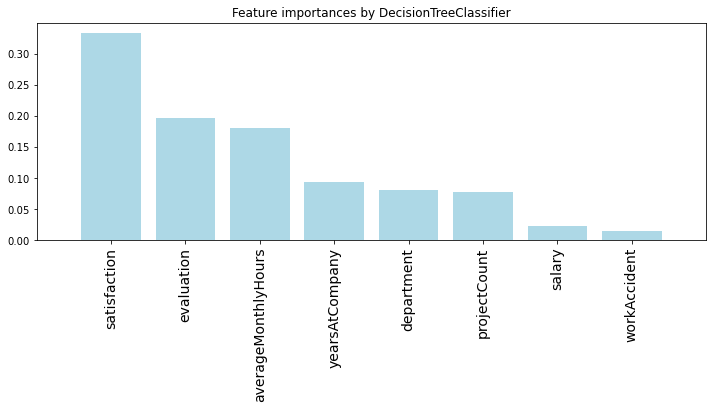

In [28]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

#### Filtrando apenas os atributos relevantes.

In [29]:
X = df[["satisfaction","evaluation","averageMonthlyHours","yearsAtCompany"]]

#### Separando os conjuntos de dados.

In [30]:
scaler = MinMaxScaler()

In [31]:
X = scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

In [33]:
X_train

array([[0.59340659, 0.21875   , 0.40449438, 0.125     ],
       [0.        , 0.703125  , 0.41573034, 0.25      ],
       [0.3956044 , 0.28125   , 0.58426966, 0.125     ],
       ...,
       [0.32967033, 0.3125    , 0.59550562, 0.125     ],
       [0.92307692, 0.28125   , 0.46067416, 0.        ],
       [0.51648352, 0.5       , 0.53932584, 0.125     ]])

#### Função do modelo de base.

In [34]:
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

#### Importando métodos de métrica de avaliação.

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [36]:
def accuracy_result(y_test,y_predict):
    acc = accuracy_score(y_test, y_predict)
    print ("Accuracy = %2.2f" % acc)

In [37]:
def roc_classification_report_results(model,y_test,y_predict):
    roc_ = roc_auc_score(y_test, y_predict)
    classfication_report = classification_report(y_test, y_predict)
    
    print ("\n{} AUC = {}\n".format(model, roc_))
    print(classfication_report)

#### Análise do modelo de baseline

In [38]:
y_predict = base_rate_model(X_test)

In [39]:
accuracy_result(y_test, y_predict)

Accuracy = 0.76


In [40]:
roc_classification_report_results("Base Model", y_test, y_predict)


Base Model AUC = 0.5

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2286
           1       0.00      0.00      0.00       714

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



C:\Users\luisc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Modelo de Regressão Logística.

#### Instânciando o algoritmo.

In [41]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#### Realizando o treinamento.

In [42]:
logis.fit(X_train, y_train)

LogisticRegression()

#### Calculando as predições.

In [43]:
y_predict = logis.predict(X_test)

#### Avaliando o resultado.

In [45]:
accuracy_result(y_test, y_predict)

Accuracy = 0.77


In [44]:
roc_classification_report_results("Logistic Regression", y_test, y_predict)


Logistic Regression AUC = 0.5406235985207731

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      2286
           1       0.55      0.11      0.18       714

    accuracy                           0.77      3000
   macro avg       0.66      0.54      0.52      3000
weighted avg       0.72      0.77      0.70      3000



### Modelo de Arvore de decisão.

#### Instânciando o algoritmo.

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

#### Realizando o treinamento.

In [47]:
dtree = dtree.fit(X_train,y_train)

#### Calculando as predições.

In [48]:
y_predict = dtree.predict(X_test)

#### Avaliando o resultado.

In [49]:
accuracy_result(y_test, y_predict)

Accuracy = 0.75


In [50]:
roc_classification_report_results("Decision Tree", y_test, y_predict)


Decision Tree AUC = 0.6690321798010542

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2286
           1       0.48      0.51      0.49       714

    accuracy                           0.75      3000
   macro avg       0.66      0.67      0.66      3000
weighted avg       0.76      0.75      0.75      3000



### Modelo de Arvore Aleatória (Random Forest)

#### Instânciando o algoritmo.

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier()

#### Realizando o treinamento.

In [53]:
rf = rf.fit(X_train,y_train)

#### Calculando as predições.

In [54]:
y_predict = rf.predict(X_test)

#### Avaliando o resultado.

In [55]:
accuracy_result(y_test, y_predict)

Accuracy = 0.83


In [56]:
roc_classification_report_results("Random Forest", y_test, y_predict)


Random Forest AUC = 0.7268668622304565

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2286
           1       0.69      0.53      0.60       714

    accuracy                           0.83      3000
   macro avg       0.77      0.73      0.75      3000
weighted avg       0.82      0.83      0.82      3000



### Pycaret

In [330]:
#!pip install pycaret

#### Importando os métodos.

In [57]:
from pycaret.classification import *

#### Definindo o Setup.

In [58]:
s = setup( df[["satisfaction","evaluation","averageMonthlyHours","yearsAtCompany","turnover"]]
          ,target = "turnover"
          ,numeric_features = ["yearsAtCompany","averageMonthlyHours",]
          ,normalize = True
          ,normalize_method = "minmax"
          ,data_split_stratify = True
          ,fix_imbalance = True,
         )

,Description,Value
0,session_id,2166
1,Target,turnover
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14998, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


#### Comparando diferentes modelos.

In [59]:
best = compare_models(fold = 5,sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8282,0.8051,0.6915,0.6268,0.6572,0.5430,0.5444,1.6400
lightgbm,Light Gradient Boosting Machine,0.8476,0.7982,0.6563,0.6894,0.6723,0.5731,0.5735,0.6760
ada,Ada Boost Classifier,0.8029,0.7960,0.6939,0.5717,0.6265,0.4945,0.4990,0.5880
rf,Random Forest Classifier,0.8144,0.7783,0.5726,0.6208,0.5953,0.4752,0.4762,1.9620
knn,K Neighbors Classifier,0.7392,0.7613,0.6875,0.4680,0.5567,0.3814,0.3957,0.3980
qda,Quadratic Discriminant Analysis,0.7188,0.7548,0.7479,0.4461,0.5588,0.3713,0.3980,0.0640
et,Extra Trees Classifier,0.8063,0.7532,0.5446,0.6048,0.5727,0.4480,0.4493,1.5160
nb,Naive Bayes,0.7078,0.7124,0.5798,0.4183,0.4859,0.2893,0.2969,0.0700
lr,Logistic Regression,0.6736,0.6947,0.6283,0.3861,0.4782,0.2599,0.2763,3.5000
lda,Linear Discriminant Analysis,0.6773,0.6938,0.6242,0.3892,0.4794,0.2634,0.2789,0.0680


#### Criando o modelo.

In [60]:
gbc = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8124,0.7889,0.6900,0.5908,0.6365,0.5111,0.5139
1,0.8510,0.8323,0.7400,0.6691,0.7028,0.6036,0.6050
2,0.8138,0.7960,0.6820,0.5951,0.6356,0.5113,0.5135
3,0.8280,0.8073,0.6693,0.6302,0.6492,0.5354,0.5358
4,0.8356,0.8007,0.6760,0.6488,0.6621,0.5536,0.5538
Mean,0.8282,0.8051,0.6915,0.6268,0.6572,0.5430,0.5444
SD,0.0144,0.0149,0.0252,0.0303,0.0247,0.0342,0.0338


#### Realizando o tunning do modelo.

In [61]:
tuned_gbc = tune_model(gbc
                      ,fold = 5
                      ,custom_grid = {
                                      "learning_rate":[0.1,0.2,0.5]
                                     ,"n_estimators":[100,500,1000]
                                     ,"min_samples_split":[1,2,5,10]
                                     ,"max_depth":[1,3,9]
                                     }
                      ,optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8124,0.7889,0.6900,0.5908,0.6365,0.5111,0.5139
1,0.8510,0.8323,0.7400,0.6691,0.7028,0.6036,0.6050
2,0.8138,0.7960,0.6820,0.5951,0.6356,0.5113,0.5135
3,0.8280,0.8073,0.6693,0.6302,0.6492,0.5354,0.5358
4,0.8356,0.8007,0.6760,0.6488,0.6621,0.5536,0.5538
Mean,0.8282,0.8051,0.6915,0.6268,0.6572,0.5430,0.5444
SD,0.0144,0.0149,0.0252,0.0303,0.0247,0.0342,0.0338


#### Finalizando o modelo.

In [336]:
final_model = finalize_model(gbc)

In [337]:
save_model(final_model,'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['yearsAtCompany',
                                                           'averageMonthlyHours'],
                                       target='turnover', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_

#### Transferindo os arquivos para o Data Lake.

#### Modelo de Classificação.

In [338]:
client.fput_object(
    "curated",
    "model.pkl",
    "model.pkl"
)

#### Exportando o conjunto de dados para o disco.

In [339]:
df.to_csv("dataset.csv",index=False)

In [340]:
client.fput_object(
    "curated",
    "dataset.csv",
    "dataset.csv"
)